In [1]:
import pickle as pkl
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
#f = open('collected_data_all_cpu.pkl', 'rb')
names = ['front-end', 'user', 'catalogue', 'orders', 'carts', 'payment', 'shipping']
metrics = ['ctn_latency', 'ctn_cpu', 'ctn_mem', 'ctn_write', 'ctn_read', 'ctn_net_in', 'ctn_net_out']
idx = 4
f = open('./data_collected/cpu-hog1_'+names[idx]+'.pkl', 'rb')
data = pkl.load(f)
data

,front-end_ctn_latency,front-end_ctn_cpu,front-end_ctn_mem,front-end_ctn_net_in,front-end_ctn_net_out,user_ctn_latency,user_ctn_cpu,user_ctn_write,user_ctn_net_in,user_ctn_net_out,...,carts_ctn_net_in,carts_ctn_net_out,payment_ctn_latency,payment_ctn_cpu,payment_ctn_net_in,payment_ctn_net_out,shipping_ctn_latency,shipping_ctn_cpu,shipping_ctn_net_in,shipping_ctn_net_out
0,0.000177,1.000000,1.000000,1.000000,1.000000,0.967725,0.919269,0.386220,0.988891,0.989757,...,0.998661,0.998728,0.017280,1.000000,1.000000,1.000000,0.000000,1.000000,0.967678,0.964468
1,0.000000,1.000000,1.000000,0.799500,0.779866,0.887883,1.000000,0.386220,1.000000,1.000000,...,1.000000,1.000000,0.007289,0.881395,1.000000,1.000000,0.011570,1.000000,1.000000,1.000000
2,0.001359,0.961924,0.806594,0.937596,0.943102,0.949053,0.908910,0.441985,1.000000,1.000000,...,1.000000,1.000000,0.000000,0.977455,0.890819,0.896963,0.053329,0.959655,0.935266,0.928831
3,0.009961,0.890476,0.508149,0.937596,0.943102,1.000000,0.864126,0.441985,0.630091,0.627753,...,0.807842,0.809256,0.004755,0.785657,0.890819,0.896963,0.049957,0.960136,0.915968,0.918411
4,0.020659,0.890476,0.508149,0.937596,0.943102,0.966232,0.813577,0.414229,0.680434,0.680339,...,0.792738,0.793640,0.021768,0.786972,0.890819,0.896963,0.014840,0.753303,0.915968,0.918411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,0.940218,0.000000,0.286293,0.023189,0.045861,0.346855,0.026278,0.119796,0.020200,0.021143,...,0.036578,0.058854,0.727300,0.047051,0.023570,0.053280,1.000000,0.053800,0.038624,0.103572
57,0.941414,0.021389,0.265850,0.023189,0.045861,0.254859,0.024546,0.119796,0.018513,0.019392,...,0.036501,0.054931,0.720943,0.064494,0.023570,0.053280,0.882299,0.055558,0.038624,0.103572
58,0.928109,0.021567,0.265944,0.022233,0.046576,0.091981,0.024546,0.418752,0.020883,0.021810,...,0.036501,0.054931,0.719980,0.062163,0.023570,0.053280,0.922422,0.054716,0.037823,0.075551
59,0.937682,0.023159,0.265944,0.022233,0.046576,0.099781,0.024993,0.418752,0.020883,0.021810,...,0.036501,0.054931,0.738897,0.062568,0.006056,0.011172,0.915165,0.038357,0.037823,0.075551


In [3]:
name=[i+'_'+'ctn_latency' for i in names]     
service_metric = data[name]
service_metric

,front-end_ctn_latency,user_ctn_latency,catalogue_ctn_latency,orders_ctn_latency,carts_ctn_latency,payment_ctn_latency,shipping_ctn_latency
0,0.000177,0.967725,0.830182,0.000061,0.000000,0.017280,0.000000
1,0.000000,0.887883,0.859862,0.000000,0.000073,0.007289,0.011570
2,0.001359,0.949053,0.950936,0.003507,0.006912,0.000000,0.053329
3,0.009961,1.000000,0.957997,0.013409,0.017887,0.004755,0.049957
4,0.020659,0.966232,0.932207,0.028595,0.029931,0.021768,0.014840
...,...,...,...,...,...,...,...
56,0.940218,0.346855,0.293520,0.940887,0.911669,0.727300,1.000000
57,0.941414,0.254859,0.446310,0.924100,0.919937,0.720943,0.882299
58,0.928109,0.091981,0.360578,0.930114,0.914825,0.719980,0.922422
59,0.937682,0.099781,0.443500,0.912199,0.911662,0.738897,0.915165


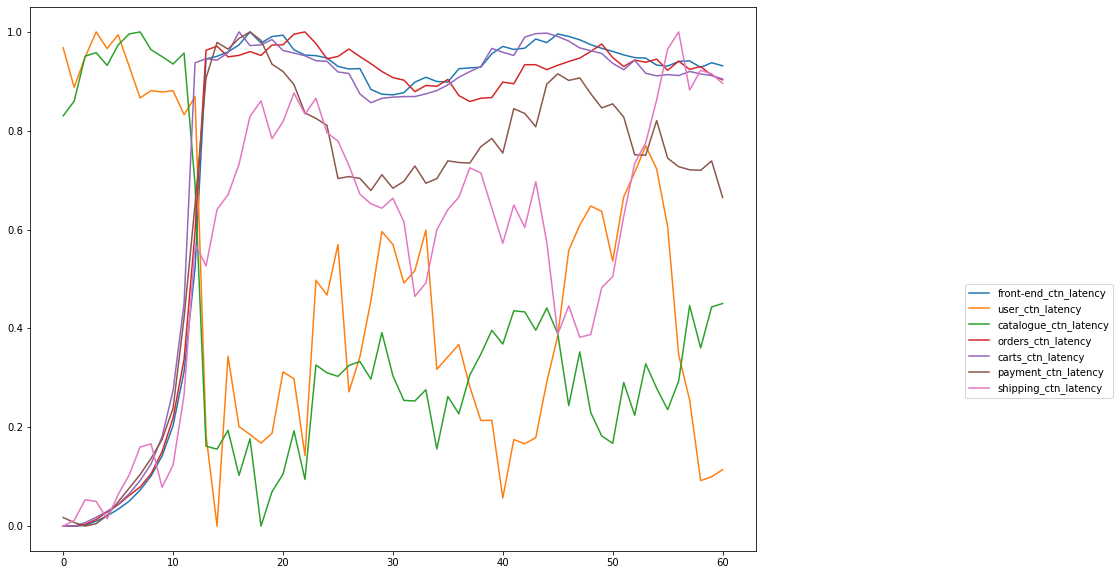

In [4]:
m = list(service_metric.columns)
plt.figure(figsize=(13,10))
for each in m:
    plt.plot(service_metric[each], label=str(each))
plt.legend(bbox_to_anchor=(1.5,0.5))
plt.show()

In [15]:
m

['front-end_ctn_latency',
 'user_ctn_latency',
 'catalogue_ctn_latency',
 'orders_ctn_latency',
 'carts_ctn_latency',
 'payment_ctn_latency',
 'shipping_ctn_latency']

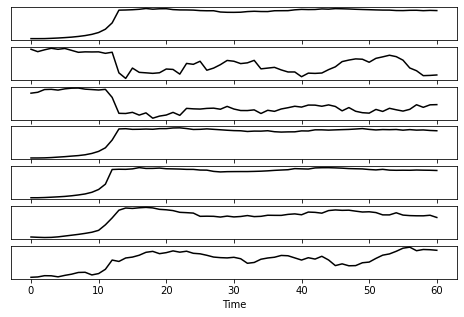

In [42]:
#plt.figure(figsize=(13,10))
fig,(ax1,ax2,ax3,ax4,ax5,ax6,ax7) = plt.subplots(7,1,figsize=(8,5), sharex=True)
ax1.plot(service_metric['front-end_ctn_latency'], c='k')
ax1.set_yticks([])
ax2.plot(service_metric['user_ctn_latency'], c='k')
ax2.set_yticks([])
ax3.plot(service_metric['catalogue_ctn_latency'], c='k')
ax3.set_yticks([])
ax4.plot(service_metric['orders_ctn_latency'], c='k')
ax4.set_yticks([])
ax5.plot(service_metric['carts_ctn_latency'], c='k')
ax5.set_yticks([])
ax6.plot(service_metric['payment_ctn_latency'], c='k')
ax6.set_yticks([])
ax7.plot(service_metric['shipping_ctn_latency'], c='k')
ax7.set_yticks([])
#ax7.set_xticks([])
plt.xlabel('Time')
#for each in m:
#    ax.plot(service_metric[each])
plt.savefig('example_metrics.png',dpi=800)
plt.show()

In [18]:
X = service_metric
met = service_metric.columns
for i, m in enumerate(met):
    print(i, m)

0 front-end_ctn_latency
1 user_ctn_latency
2 catalogue_ctn_latency
3 orders_ctn_latency
4 carts_ctn_latency
5 payment_ctn_latency
6 shipping_ctn_latency


## PC

  0%|          | 0/7 [00:00<?, ?it/s]

PC result
[[ 0  1  0  1 -1  0  0]
 [-1  0  0  0  0  0  0]
 [ 0  0  0 -1  0  0  0]
 [-1  0 -1  0  0  0 -1]
 [ 1  0  0  0  0 -1  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0 -1  0  0  0]]
[0, 1, 2, 3, 4, 5, 6]
[[0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]]


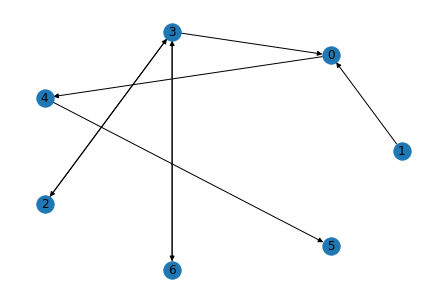

In [19]:
from causallearn.search.ConstraintBased.PC import pc
from causallearn.utils.cit import chisq, fisherz, gsq, kci, mv_fisherz

cg = pc(X.to_numpy(), 0.05, fisherz, False, 0, -1)
adj = cg.G.graph

print('PC result')
print(adj)

# Change the adj to graph
G = nx.DiGraph()
for i in range(len(adj)):
    for j in range(len(adj)):
        if adj[i,j] == -1:
            G.add_edge(i,j)
        if adj[i,j] == 1:
            G.add_edge(j,i)
nodes = sorted(G.nodes())
print(nodes)
adj = np.asarray(nx.to_numpy_matrix(G, nodelist=nodes))
pos=nx.circular_layout(G)
print(adj)
nx.draw(G, pos=pos, with_labels=True)

In [20]:
# PageRank
from sknetwork.ranking import PageRank
pagerank = PageRank()
scores = pagerank.fit_transform(adj.T)
print(scores)
#cmap = plt.cm.coolwarm

score_dict = {}
for i,s in enumerate(scores):
    score_dict[i] = s
print(sorted(score_dict.items(), key=lambda item:item[1], reverse=True))

[0.05780934 0.17165935 0.18697542 0.33349876 0.04111389 0.02196782
 0.18697542]
[(3, 0.33349876259748923), (2, 0.18697541620384045), (6, 0.18697541620384045), (1, 0.17165935003418045), (0, 0.05780934154932836), (4, 0.041113891918102274), (5, 0.021967821493218777)]


## GES

x0
x1
x2
x3
x4
x5
x6
[[ 0  0  0  0 -1  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]]
x0
x1
x2
x3
x4
x5
x6
[[ 0  0  0  1 -1  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [-1  0  0  0  0  0  0]
 [-1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]]
x0
x1
x2
x3
x4
x5
x6
x0
x4
[[ 0  0  0 -1 -1  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [-1  0  0  0  0  0  0]
 [-1  0  0  0  0  1  0]
 [ 0  0  0  0 -1  0  0]
 [ 0  0  0  0  0  0  0]]
x0
x1
x2
x3
x4
x5
x6
x0
x3
x4
x0
x3
[[ 0  0  0 -1 -1  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0 -1  0  0  0]
 [-1  0  1  0  0  0  0]
 [-1  0  0  0  0 -1  0]
 [ 0  0  0  0 -1  0  0]
 [ 0  0  0  0  0  0  0]]
x0
x1
x2
x3
x4
x5
x6
x0
x4
x5
[[ 0  0  0 -1 -1  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0 -1  0  0  0]
 [-1  0 -1  0  0  0  0]
 [-1  0  0  0  0 -1  1]
 [ 0  0  0  0 -1  0  0]
 [ 0  0  0  0 -1  0  0]]
x0
x1
x2
x3
x4
x5
x6

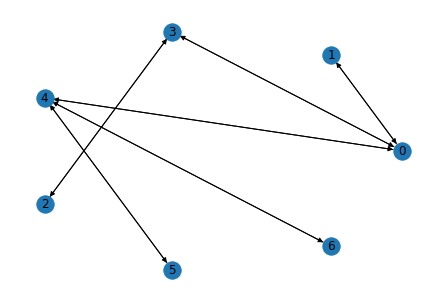

In [21]:
from causallearn.search.ScoreBased.GES import ges

#X = data.iloc[:,1:]
X = X - np.tile(np.mean(X, axis=0), (X.shape[0], 1))
X = np.dot(X, np.diag(1 / np.std(X, axis=0)))
maxP = 5  # maximum number of parents when searching the graph
parameters = {'kfold': 10, 'lambda': 0.01}
#X = X[:50, :]
Record = ges(X, 'local_score_CV_general', maxP=maxP, parameters=parameters)
adj = Record['G'].graph

# Change the adj to graph 
G = nx.DiGraph()
for i in range(len(adj)):
    for j in range(len(adj)):
        if adj[i,j] == -1:
            G.add_edge(i,j)
        if adj[i,j] == 1:
            G.add_edge(j,i)
nodes = sorted(G.nodes())
print(nodes)
adj = np.asarray(nx.to_numpy_matrix(G, nodelist=nodes))
print(adj)
pos=nx.circular_layout(G)
nx.draw(G, pos=pos, with_labels=True)

In [22]:
# PageRank
from sknetwork.ranking import PageRank
pagerank = PageRank()
scores = pagerank.fit_transform(adj.T)
print(scores)
#cmap = plt.cm.coolwarm

score_dict = {}
for i,s in enumerate(scores):
    score_dict[i] = s
print(sorted(score_dict.items(), key=lambda item:item[1], reverse=True))

[0.24115393 0.0858943  0.09394367 0.16242095 0.23297099 0.09180808
 0.09180808]
[(0, 0.2411539317142216), (4, 0.23297098637094135), (3, 0.16242095098116283), (2, 0.09394366665580198), (5, 0.09180808281072622), (6, 0.09180808281072622), (1, 0.08589429865641973)]


## LINGAM

In [23]:
from causallearn.search.FCMBased import lingam
model = lingam.ICALiNGAM()
model.fit(X)

print('LiNGAM result')
print(model.causal_order_) # the later virable is unable to cause the former virable
#print(model.adjacency_matrix_)

# Acutal matrix: row points to col 
adj = model.adjacency_matrix_.T 
# For PageRank, should adj.T
print(adj)

LiNGAM result
[3, 0, 4, 2, 5, 6, 1]
[[ 0.         -0.32019563  0.          0.          0.53017543  0.
   0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.          0.          0.          0.          0.         -0.22274307
   0.        ]
 [ 0.99556686  0.         -0.92492362  0.          0.45748189  0.
   0.84946968]
 [ 0.          0.          0.          0.          0.          0.77024047
   0.        ]
 [ 0.         -0.21134291  0.          0.          0.          0.
   0.        ]
 [ 0.         -0.29016697  0.          0.          0.          0.
   0.        ]]


In [24]:
with open('cpu-hog_front-end_lingam_adj.pkl', 'wb') as f:
    pkl.dump(adj, f)

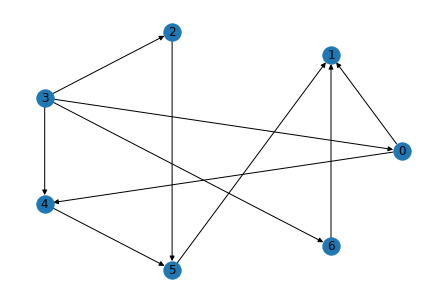

In [25]:
org_G = nx.from_numpy_matrix(adj, parallel_edges=True, create_using=nx.DiGraph)
pos=nx.circular_layout(org_G)
nx.draw(org_G, pos=pos, with_labels=True)

In [26]:
# PageRank
from sknetwork.ranking import PageRank
pagerank = PageRank()
scores = pagerank.fit_transform(np.abs(adj.T))
print(scores)
#cmap = plt.cm.coolwarm

score_dict = {}
for i,s in enumerate(scores):
    score_dict[i] = s
print(sorted(score_dict.items(), key=lambda item:item[1], reverse=True))

[0.12041905 0.03531586 0.0504132  0.60550303 0.08752213 0.04804044
 0.05278629]
[(3, 0.6055030315737471), (0, 0.12041904566781331), (4, 0.08752212796403312), (6, 0.05278629173521759), (2, 0.05041320400105439), (5, 0.04804043746356521), (1, 0.035315861594569356)]
